In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
df = [line for line in open('smsspamcollection/SMSSpamCollection')]

In [200]:
df[:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n"]

In [204]:
df=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=["label", "message"] )

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:

def countword(message):
    count = len(message)
    return count
df['WordCount']=df['message'].apply(countword)

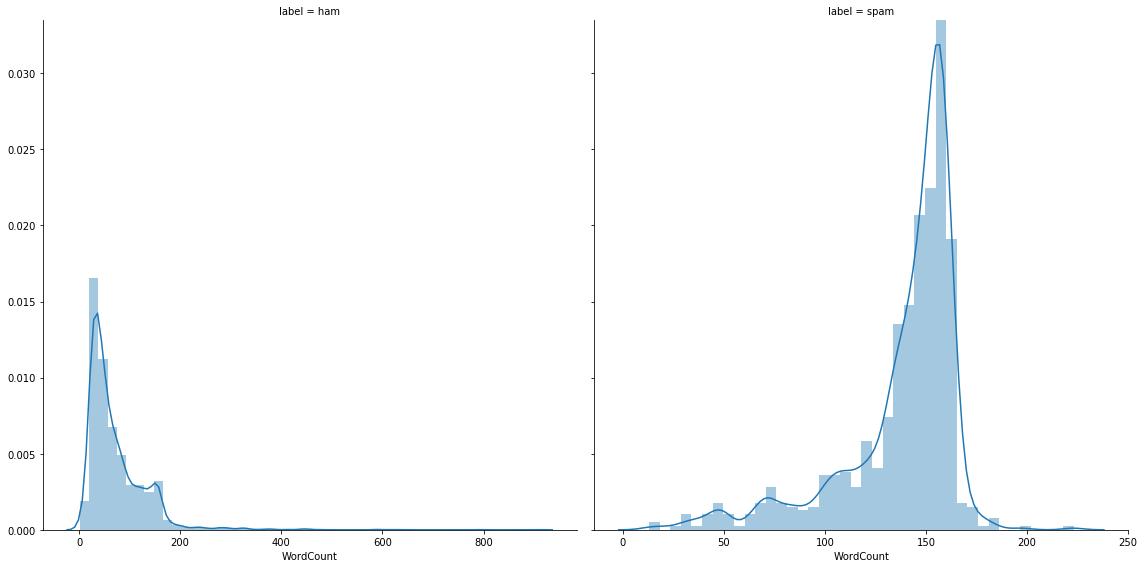

In [31]:
g = sns.FacetGrid(df, col='label', size=8, sharex=False)
g.map(sns.distplot, 'WordCount')


In [35]:
count_ham=0
count_spam=0
for i in range(len(df)):
    if(df['label'][i]=='ham'):
        count_ham+=1
    else:
        count_spam+=1

In [168]:
not_spam = int(round(count_ham / (count_ham+count_spam) *100,0))
spam = int(round(count_spam / (count_ham+count_spam)*100,0))

Total not spam:  4825
total spam:  747


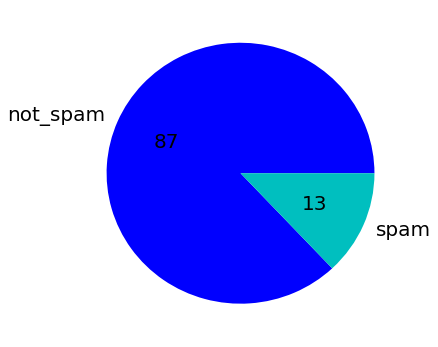

In [180]:
print('Total not spam: ', count_ham)
print('total spam: ',count_spam )
series = pd.Series([not_spam,spam], index=['not_spam','spam'], name='' )
series.plot.pie( colors=[ 'b', 'c'],autopct=('%.0f'), fontsize=20, figsize=(6, 6))

In [ ]:
In order to perform the logistic regression analysis, the data need to be in a form of numeric features.

In [205]:
df['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [206]:
X=df['message']
y=df['label']

In [185]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [186]:
def remove_punc(message):
    return(''.join([x for x in message if x not in string.punctuation]))

In [ ]:
tranform the message into a vector of numeric values. 

In [207]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=remove_punc)
x = cv.fit_transform(x)

In [218]:
print(x)

  (0, 51)	1
  (0, 46)	1
  (0, 15)	1
  (0, 44)	2
  (0, 42)	1
  (0, 61)	2
  (0, 57)	1
  (0, 43)	8
  (0, 40)	3
  (0, 60)	1
  (0, 13)	1
  (0, 63)	2
  (0, 64)	1
  (0, 39)	7
  (0, 41)	1
  (0, 54)	1
  (0, 45)	4
  (0, 56)	6
  (0, 48)	1
  (0, 50)	6
  (0, 47)	6
  (0, 58)	7
  (0, 52)	7
  (0, 59)	4
  (0, 2)	19
  :	:
  (5570, 41)	2
  (5570, 45)	5
  (5570, 56)	3
  (5570, 50)	2
  (5570, 47)	10
  (5570, 58)	9
  (5570, 52)	7
  (5570, 59)	4
  (5570, 2)	25
  (5570, 53)	4
  (5571, 30)	1
  (5571, 21)	1
  (5571, 51)	1
  (5571, 44)	1
  (5571, 57)	2
  (5571, 43)	2
  (5571, 39)	1
  (5571, 56)	1
  (5571, 50)	1
  (5571, 47)	1
  (5571, 58)	4
  (5571, 52)	1
  (5571, 59)	1
  (5571, 2)	5
  (5571, 53)	2


In [219]:
# some words have a much higher occurence.
# weigh the counts, so that frequent tokens get lower weight

In [221]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_fit=TfidfTransformer()
tfidf_transform=tfidf_fit.fit_transform(x)

In [222]:
print(tfidf_transform)

  (0, 19)	0.0993698003197
  (0, 53)	0.238055507009
  (0, 2)	0.604712973628
  (0, 59)	0.157277623347
  (0, 52)	0.24634734814
  (0, 58)	0.242468247037
  (0, 47)	0.215044265832
  (0, 50)	0.236003321753
  (0, 48)	0.10268359535
  (0, 56)	0.22165557278
  (0, 45)	0.181700895723
  (0, 54)	0.0515922847365
  (0, 41)	0.0461446617393
  (0, 39)	0.241813768687
  (0, 64)	0.115985830738
  (0, 63)	0.083512792968
  (0, 13)	0.0832057779092
  (0, 60)	0.0623913110533
  (0, 40)	0.165584912453
  (0, 43)	0.269336843325
  (0, 57)	0.0377243495971
  (0, 61)	0.0915924418603
  (0, 42)	0.0422528829519
  (0, 44)	0.107035339522
  (0, 15)	0.0905937692936
  :	:
  (5570, 57)	0.146730110992
  (5570, 61)	0.0356251845393
  (5570, 42)	0.197212790301
  (5570, 44)	0.0832635017747
  (5570, 46)	0.118374200671
  (5570, 51)	0.0651601852519
  (5570, 49)	0.0854837729021
  (5570, 32)	0.0607724753081
  (5570, 62)	0.0701617403907
  (5570, 21)	0.0478660439416
  (5571, 53)	0.232035006405
  (5571, 2)	0.542886462038
  (5571, 59)	0.1341375

In [ ]:
# declare hte variables with some reasonable values
regressors = len(X_train[0]) 
init_m = 0
init_b = [0 for x in range(regressors)]
learning_rate = 0.0001
num_iteration = 500 
N = len(X_train) 


# training set
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate)

    return [init_m1, init_b1] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller



m, b = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)       